# Практическая работа №3: Регрессионный анализ
Выполнила студентка гр. 1375 Сницарь Валерия. Вариант №25

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
1.Линейная регрессионная модель/
Линейная регрессия некоторой зависимой переменной $y$ на наборе независимых переменных $x = (x_1, …, x_n)$, где n – это число наблюдений, предполагает, что линейное отношение между $y$ и $x$: $y =\beta_0  + \beta_1 x_1 + ⋯ + \beta_n x_n + \varepsilon$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$ – коэффициенты регрессии (параметры), и $\varepsilon$ – случайная ошибка.

2.МНК (Метод Наименьших Квадратов)
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

Нормальные уравнения: $XX^{\intercal}\beta=XY$\
Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$

$RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$

$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m$

3.Доверительный интервал
ДНО функции:$\psi=C^{\intercal}\beta$\
МНК-оценка: $\widehat{\psi}=C^{\intercal}\beta$

Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$\
Распределение $\widehat{\psi} \sim \mathcal{N}(\psi,\sigma^{2}b)$\
$\displaystyle \frac{\widehat{\psi}-\psi}{S\sqrt{b}} \sim \mathcal{S}_{n-r}$

Доверительный интервал уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b},\widehat{\psi} + X_{\alpha}S\sqrt{b} \right]$,\
где $\displaystyle X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

5.Уравнение доверительного эллипсоида: $A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$

6.Критерий $\chi^2$ для проверки гипотез

Если $\mathcal{X}^{2}_{N-1,1-\alpha_{1}} \lt \chi^2_{набл}$, то гипотезу отвергаем

Если $\mathcal{X}^{2}_{N-1,1-\alpha_{1}} \gt \chi^2_{набл}$, то гипотезу принимаем


## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X
. Полученные результаты содержательно проинтерпретировать.

In [68]:
import scipy.optimize as spo
import scipy.stats as sps
import matplotlib.pyplot as plt

## Выполнение работы
1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить метод наименьшего квадрата оценки параметров сдвига  β0  и масштаба  β1 . Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки

  * Линейная регрессионная модель переменной Y по переменной X:
  $Y = \beta_0 + \beta_1X + \varepsilon,$ $\mathbb{E}_\theta \varepsilon = 0,Var_\theta \varepsilon = \sigma^2 E$


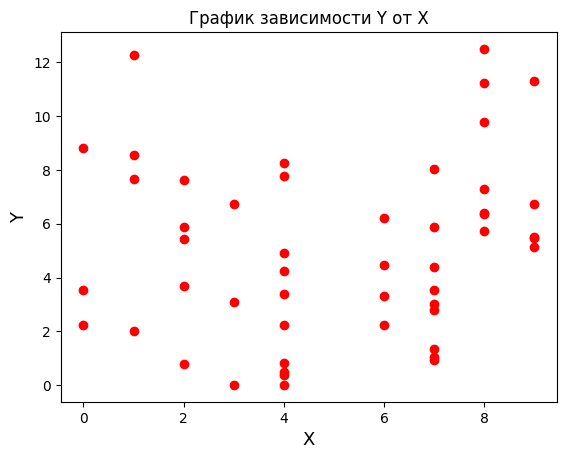

In [69]:
from mpl_toolkits import mplot3d
import numpy as np

X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])

plt.title('График зависимости Y от X')
plt.xlabel('X', fontsize=13)
plt.ylabel('Y', fontsize=13)
plt.scatter(X, Y, color='red')
plt.show()

  * Нормальные уравнения: $ X X^{\intercal} \beta = X Y $
  * Решение системы нормальных уравнений в регулярном случае $\hat{\beta} = (X X^{\intercal})^{-1} XY $

In [70]:
import numpy as np
from numpy.linalg import matrix_power
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])

XT = X.transpose()

XXT = np.dot(X, XT)

XY = np.dot(X, Y)

b = np.dot(np.linalg.inv(XXT), XY)

print("b0:", round(b[0], 10), "b1:", round(b[1], 10))


b0: 4.1237348964 b1: 0.180650419


  * МНК-оценки параметров
$ \hat{\beta} = \left(\begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left(\begin{array}{c} 4.1237348964 \\ 0.180650419 \end{array} \right) \rightarrow Y \approx 4.1237348964 + 0.180650419X$


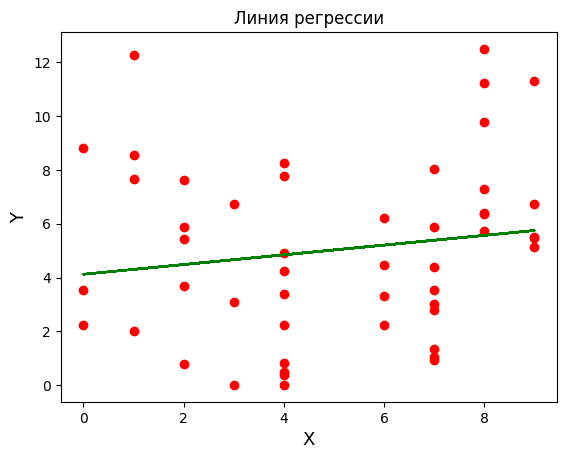

In [71]:
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])
b = np.array([4.1237348964, 0.180650419])

XT = X.transpose()

plt.title('Линия регрессии')
plt.xlabel('X', fontsize=13)
plt.ylabel('Y', fontsize=13)
plt.scatter(X[1], Y, color='red')
plt.plot(X[1], np.dot(XT, b), 'green')
plt.show()

Визуально оценивая полученные данные и построенную оценку, можно сказать, что оценка по линии регрессии соответствует исходным данным.

2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$ . Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

  * Несмещённая оценка дисперсии находится по формуле\
$ \displaystyle s^2 =  \frac{SS_e}{ n - r } = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^{\intercal} \hat{\beta})^{\intercal} (Y - X^{\intercal} \hat{\beta})}{n - r},$ $r$ - ранг матрицы $X,$ $n$ - количество элементов в выборке

In [72]:
from numpy.linalg import matrix_rank
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])
b = np.array([4.1237348964, 0.180650419])

n = 50
r = np.linalg.matrix_rank(X)
XT = X.transpose()

e = Y - np.dot(XT, b)
eT = e.transpose()

s_2 = np.dot(eT, e) / (n - r)

print("Несмещённая оценка дисперсии =", round(s_2, 10))


Несмещённая оценка дисперсии = 10.7428101134


  * $ \displaystyle s^2 \approx 10.7428101134$

  * На базе ошибок построим гистограмму с шагом $h = 2.20$

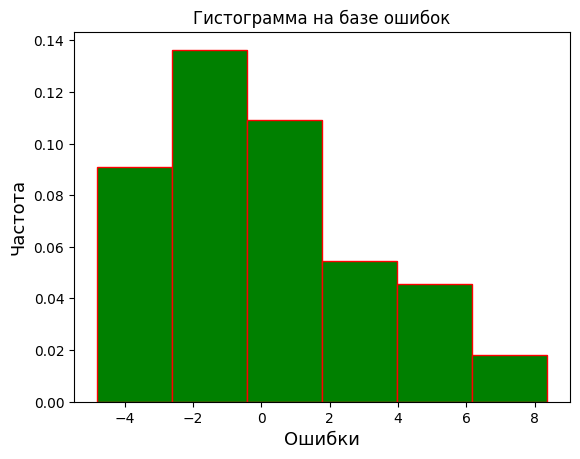

In [73]:
from scipy.stats import chisquare, kstest, norm, chi2, stats, t
from numpy.linalg import matrix_rank
import numpy as np
X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])
b = np.array([4.1237348964, 0.180650419])

Y_1 = b[0] + b[1] * X
err = Y - Y_1
err_mi = min(err)
err_ma = max(err)

h = 2.20
plt.hist(err, bins = np.arange(err_mi, err_ma + h, h),density = True, edgecolor='red', color='green')
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.show()

* **Проверка гипотезы нормальности**

Основная гипотеза $H_0$: $\vec{\epsilon} \sim \mathcal{N}(0, \sigma^2)$


In [74]:
a = 0
sigma = 10.74**0.5
alpha = 0.01

inters = [[-np.inf, -2.7], [-2.7, 0], [0, 3], [3,np.inf]]

def p(x):
    return norm.cdf(x, a, sigma)

cr = 0
for inter in inters:
    p_ = p(inter[1]) - p(inter[0])
    n_ = len([x for x in err if inter[0] < x <= inter[1]])
    n_p = len(err)*p_
    temp = ((n_-n_p)**2)/(n_p)
    cr += temp
    print(inter ,'n =', n_, 'p =',round(p_, 2), 'np =', round(n_p, 2), ' ', round(temp, 2))

print(cr)

[-inf, -2.7] n = 10 p = 0.21 np = 10.25   0.01
[-2.7, 0] n = 17 p = 0.29 np = 14.75   0.34
[0, 3] n = 13 p = 0.32 np = 16.0   0.56
[3, inf] n = 10 p = 0.18 np = 9.0   0.11
1.0234191830893076


$I_1 = (\infty, -2.7]$ $n_1 = 10$  $p_1 = 0.21$  $np_1 = 10.25$   $\frac{(n_1-np_1)^{2}}{np_1} = 0.01$

$I_2 = (-2.7, 0]$ $n_2 = 17$  $p_2 = 0.29$  $np_2 = 14.75$   $\frac{(n_2-np_2)^{2}}{np_2} = 0.34$

$I_3 = (0, 3]$ $n_3 = 13$  $p_3 = 0.32$  $np_3 = 16.0$   $\frac{(n_3-np_3)^{2}}{np_3} = 0.56$

$I_4 = (3, \infty)$ $n_4 = 10$  $p_4 = 0.18$  $np_4 = 9.0$   $\frac{(n_4-np_4)^{2}}{np_4} = 0.11$

$Χ^2 = \sum_{i=1}^{4}\frac{(n_i - np_i)^2}{np_i} = 1.02$

$Χ^2_{N-1,\alpha} = Χ^2_{3,0.01} \simeq 11.34$(табличное значение)

$Χ^{2} <  Χ^2_{3,0.01} \Rightarrow$ нет оснований отвергнуть гипотезу


* Оценка расстояния до класса нормальных распределений по Колмогорову

Выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$

In [87]:
sigma = np.sqrt(10.74)

def cdf(x):
  return norm.cdf(x, loc = 0, scale = sigma)
Dn, _ = kstest(err, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова:',eta)

Критерий Колмогорова: 0.5482509835003023


Уровень значимости $\alpha = 0.01$.

Квантиль $d_{1 - \alpha}$


In [76]:
from scipy.stats import kstwobign
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', d)

Квантиль:  1.6276236115189502


Критическая область $V_k = (d_{1 - \alpha},+ \infty)  = (1.63, + \infty)$

$\eta \in V_k \Rightarrow$ гипотеза отвергается.

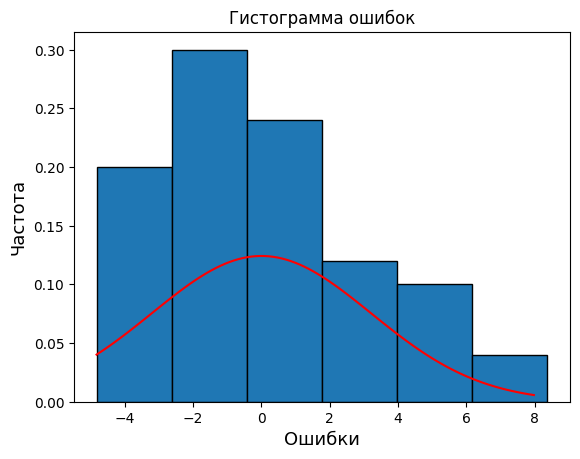

In [86]:
y, edges, _= plt.hist(err, edgecolor='black', bins=np.arange(err_mi, err_ma + h, h), weights=np.ones_like(err) / n)
values = np.linspace(min(err), max(err), 100)

plt.title('Гистограмма ошибок')
plt.xlabel('Ошибки', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.plot(values, norm.pdf(values, np.array(err).mean(), np.array(err).std()), color='red')
plt.show()


Распределение ошибок визуально не похоже на нормальное распределение.

3. В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

$\displaystyle \frac{\hat{\psi} - \psi}{s \sqrt{b}} \sim S_{n - r} $, где
$ \hat{\psi} = C^{\intercal} \hat{\beta}$ (МНК-оценка) $,b_\psi = C^{\intercal} (X X^{\intercal})^{-1} C$(элемент дисперсии оценки). Пусть $ C_0 = \left( \begin{array}{c} 1 \\ 0 \end{array} \right)$  и $C_1 = \left( \begin{array}{c} 0 \\ 1 \end{array} \right) $ \
$ \hat{\psi_0} = \left( \begin{array}{c} 1 & 0 \end{array} \right) \left( \begin{array}{c} 4.1237348964 \\ 0.180650419 \end{array} \right)$


$ \hat{\psi_1} = \left( \begin{array}{c} 0 & 1 \end{array} \right) \left( \begin{array}{c} 4.1237348964 \\ 0.180650419 \end{array} \right) $


$b_{\psi_0} = C_0^{\intercal} (X X^{\intercal})^{-1} C_0$

$b_{\psi_1} = C_1^{\intercal} (X X^{\intercal})^{-1} C_1$

In [51]:
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])

C_0 = np.array([1, 0])
C_1 = np.array([0, 1])
mnk = np.array([4.12373489640,0.180650419])
fi_0 = np.matmul(C_0,mnk)
fi_1 = np.matmul(C_1,mnk)
print(fi_0)
print(fi_1)

4.1237348964
0.180650419


$ \hat{\psi_0} = 4.1237348964$


$ \hat{\psi_1} = 0.180650419$

In [52]:
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])

C_0 = np.array([1, 0])
C_1 = np.array([0, 1])

CT_0 = C_0.transpose()
CT_1 = C_1.transpose()

XT = X.transpose()
XXT = np.dot(X, XT)

print('XXT = ',XXT)

b_0 = np.dot(np.dot(CT_0, np.linalg.inv(XXT)), C_0)
print("b_0 =",  round(b_0, 10))


b_1 = np.dot(np.dot(CT_1, np.linalg.inv(XXT)), C_1)
print("b_1 =", round(b_1, 10))

XXT =  [[  50  251]
 [ 251 1649]]
b_0 = 0.0847858502
b_1 = 0.0025708263


$b_{\psi_0} = 0.0847858502$

$b_{\psi_1} = 0.0025708263$


Доверительный интервал:
$ \psi \in \left[ \hat{\psi} - x_\alpha S \sqrt{b_\psi}, \hat{\psi} + x_\alpha S \sqrt{b_\psi} \right] $, где $\displaystyle x_\alpha : S_{n - r} = S_{48} = 1 - \frac{\alpha}{2} = 0.995$

In [92]:
S = 0.995
x_a = sps.t.ppf(S, 48)

print("x_a =", round(x_a, 3))
print("Функция распределения S =", round(sps.t.cdf(x_a, 48), 2))

x_a = 2.682
Функция распределения S = 1.0


$x_\alpha : S_{n - r} = S_{48} = 1 - \frac{\alpha}{2}=  0.995$

$x_\alpha = 2.682$

In [54]:
print("Доверительный интервал b0 от", round(4.12373489640 - 2.682 * (10.7428101134 * 0.0847858502) ** 0.5, 10), "до", round(4.12373489640 + 2.682 * (10.7428101134 * 0.0847858502) ** 0.5, 10))
print("Доверительный интервал b1 от", round(0.180650419 - 2.682 * (10.7428101134 * 0.0025708263) ** 0.5, 10), "до", round(0.180650419 + 2.682 * (10.7428101134 * 0.0025708263) ** 0.5, 10))

Доверительный интервал b0 от 1.5640918047 до 6.6833779881
Доверительный интервал b1 от -0.2650613382 до 0.6263621762


$ \beta_0 \in \left[ 1.5640918047, 6.6833779881 \right] $

$ \beta_1 \in \left[ -0.2650613382, 0.6263621762 \right] $

Построим доверительный эллипс для параметров $( \beta_0, \beta_1 )$.\
$ A_\alpha = \{ \vec{x} : ( \vec{x} - \hat{\psi} )^{\intercal}  B^{-1} ( \vec{x} - \hat{\psi} ) \leq q S^2 x_\alpha \} $, где $ x_\alpha :
\mathcal{F_{q,n-r}}(x_\alpha) = 1 - \alpha = \mathcal {F_{2,48}} = 0.99;  
B = C^{\intercal}  (X X^{\intercal} )^{-1} C$\
$C = \left( \begin{array}{c} 1 & 0 \\ 0 & 1 \end{array} \right) = E$.\
Тогда матрица $B = (X X^{\intercal} )^{-1} \implies B^{-1} = X X^{\intercal} $

Тогда, $\begin{pmatrix} x \\ y \end{pmatrix} = P\left(\widehat{\psi} - \psi\right)$ , где $P$ - матрица собственных векторов матрицы $XX^{\intercal}$.

Уравнение доверительного эллипса:

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 \leq qs^2x_{\alpha}$

Найдём $x_\alpha$

In [93]:
F = 0.99
x_a1 = sps.f.ppf(F, 2, 48)


print("При квантиле x_a =", round(x_a, 10))
print("F =", round(sps.f.cdf(x_a, 2, 48), 10))

При квантиле x_a = 2.682204027
F = 0.921340898


In [56]:
eigenvalues, eigenvectors = np.linalg.eig(np.array(XXT))
print('P =\n', eigenvectors)

P =
 [[-0.98845494 -0.15151515]
 [ 0.15151515 -0.98845494]]


Матрица собственных векторов
$ P\left(\widehat{\psi} - \psi\right) = \begin{pmatrix} -0.99 & -0.15 \\ 0.15 & -0.99\end{pmatrix} \begin{pmatrix} 4.12 - \beta_0 \\ 0.18 - \beta_1 \end{pmatrix} = \begin{pmatrix} -4.1058 + 0.99\beta_0 + 0.15\beta_1 \\ 0.4398 - 0.15\beta_0 + 0.99\beta_1\end{pmatrix}$


$(\vec{x} - \hat{\psi} )^{\intercal} B^{-1} ( \vec{x} - \hat{\psi} ) = \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right) - \left( \begin{array}{c} 4.12 \\ 0.18 \end{array} \right) \right)^{\intercal} X X^{\intercal} \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right) - \left( \begin{array}{c} 4.12 \\ 0.18 \end{array} \right) \right)$\
$= \left( \begin{array}{c} \beta_0 -  4.12 \\ \beta_1 - 0.18 \end{array} \right)^{\intercal} \left( \begin{array}{c} 50 & 251 \\ 251 & 1649  \end{array} \right) \left( \begin{array}{c} \beta_0 -  4.12 \\ \beta_1 - 0.18 \end{array} \right)$

Перепишем коэффициенты квадратичной формы в матрицу.\
$ A = \left( \begin{array}{c} 50 & 251\\ 251 & 1649  \end{array} \right)$

Найдём собственные числа.\
$ \left| \begin{array}{c} 50 - \lambda & 251 \\ 251 & 1649 - \lambda \end{array} \right| = 0 ⇒ \lambda_1 = 11.53, \lambda_2 = 1687.47$

$ \lambda_1 \cdot x^2 + \lambda_2 \cdot y^2 \leq q S^2 x_\alpha$\
$  11.53 \cdot x^2 + 1687.47 \cdot y^2 \leq 57,57$\
$ 0.20 \cdot x^2 +  29.31 \cdot y^2 \leq 1$ - уравнение эллипса

$q = 2$ - размер модели

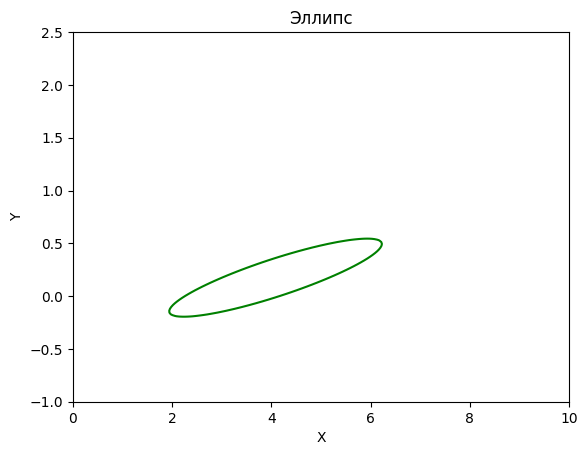

In [94]:
q = 2
x_a1 = 2.682204027
s2 = 10.74
a = eigenvalues[0] / (q*s2*x_a)
b = eigenvalues[1] / (q*s2*x_a)

def ellipse(b1, b2):
  return (( -4.1058 + 0.99 * b1 + 0.35 * b2)**2 * a) + (( 0.4398 - 0.15 * b1 + 0.99 * b2)**2 * b)


x = np.linspace(0, 10, 200)
y = np.linspace(-1, 2.5, 200)
X_plot, Y_plot = np.meshgrid(x, y)



plt.title("Эллипс")
plt.xlabel("X")
plt.ylabel("Y")
plt.contour(X_plot, Y_plot, ellipse(X_plot, Y_plot), levels=[1], colors='green')
plt.show()

$\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} \normalsize \leq 1$(возьмём =1)

Малая полуось: $a = \large \sqrt{\frac{\lambda_1}{qs^2x_{\alpha}}}$

Большая полуось: $b = \large \sqrt{\frac{\lambda_2}{qs^2x_{\alpha}}}$

In [58]:
a = (eigenvalues[0] / (q*s2*x_a1))**0.5
print('а =', a)


b = (eigenvalues[1] / (q*s2*x_a1))**0.5
print('b =', b)

а = 0.4933886184981324
b = 5.970046387526231


Малая полуось: 0.4933886184981324

Большая полуось: 5.970046387526231


4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Нулевая гипотеза: $H_0: \beta_1 = 0$

Альтернативная гипотеза: $H_A: \beta_1 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ ,

$B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Тогда $\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_1}$, а значит $\mathbb{F} = \large \frac{\widehat{\beta_1}^2}{bqs^2}$


$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha = 0.99 \rightarrow x_{\alpha} = 2.68$

In [59]:
from scipy.stats import f

F = 0.99
x_a1 = sps.f.ppf(F, 2, 48)
print("При квантиле x_a =", round(x_a, 10))

C = np.array([0, 1])
CT = C.transpose()
b = np.matmul(np.matmul(CT, np.linalg.inv(XXT)), C)
F = (0.180650419**2) / (b*q*s2)
print('F - критерий = ', F)


q = 1
r = 2
alpha = 0.01
F_q = f.ppf(1 - alpha, q, n - r)
print('Критическое значение:', F_q)

При квантиле x_a = 2.682204027
F - критерий =  0.5909774930046037
Критическое значение: 7.194218442187959


Не отвергаем нулевую гипотезу, так как статистика критерия меньше табличного значения

5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

Квадратичная регрессионная модель: $Y = \beta_0 + \beta_1X  + \beta_2X^2 + \varepsilon$

$X = \begin{pmatrix} 1 & 1  & 1 & \cdots & 1 \\ x_1 & x_2 & x_3 & \cdots & x_{50} \\ x_1^2 & x_2^2 & x_3^2 & \cdots & x_{50}^2\end{pmatrix}$

In [60]:
X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])
X2 = [i**2 for i in X]

X_2 = [np.array([1]*50), X, X2]

XT_2 = np.transpose(X_2)
XXT_2 = np.matmul(X_2, XT_2)
print( XXT_2)


[[   50   251  1649]
 [  251  1649 11945]
 [ 1649 11945 91157]]


$XX^{\intercal} =  \begin{pmatrix}50 & 251 & 1649\\ 251 & 1649 & 11945 \\ 1649 & 11945 & 91157 \end{pmatrix}$

In [61]:
X = np.array([[1]*50, [4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8]])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])

XXT_2 = np.dot(X_2, XT_2)

XY_2 = np.dot(X_2, Y)

b_2 = np.dot(np.linalg.inv(XXT_2), XY_2)


print("b0:", round(b_2[0], 10), "b1:", round(b_2[1], 10), "b2:",round(b_2[2],10))

b0: 6.9828463696 b1: -1.6983181169 b2: 0.1993120248


$\widehat{\beta} = \left(XX^{\intercal}\right)^{-1}XY = \begin{pmatrix} 6.98 \\ -1.70 \\ 0.20 \end{pmatrix} \rightarrow Y \approx 6.98 - 1.70X + 0.20X^2$

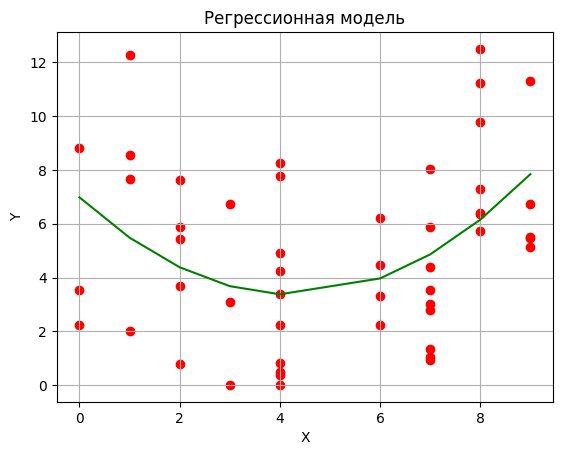

In [62]:
X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])
Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])
x_v = np.unique(X)
Y2 = b_2[0] + b_2[1] * x_v + b_2[2] * x_v**2

plt.title('Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.scatter(X, Y, color = 'red')
plt.plot(x_v, Y2, color = 'green');

6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{47} = \frac{1}{n - r} \cdot \sum \limits_{i = 1}^n\left(Y_i - \widehat{\beta_0} - \widehat{\beta_1}X_i - \widehat{\beta_2}X_i^2\right) ≈ 8.74 $

In [63]:
X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])
X2 = [i**2 for i in X]

Y = np.array([0.02, 6.35, 5.48, 0.38, 0.94, 3.69, 2.23, 5.75, 8.57, 5.88, 2.80, 2.22, 0.48, 4.23, 1.36, 8.83, 2.22, 6.23, 0.01, 3.38, 3.01, 0.78, 5.13, 11.22, 2.00, 3.11, 7.64, 11.31, 3.53, 7.77, 0.84, 4.91, 9.77, 3.52, 12.50, 5.52, 8.27, 4.41, 7.68, 6.39, 4.45, 12.28, 8.04, 6.74, 3.30, 1.04, 5.87, 6.72, 5.42, 7.31])
b2 = np.array([6.9828463696, -1.6983181169, 0.1993120248])

n = 50
r = np.linalg.matrix_rank(X)

sum_2 = np.sum((Y - b2[0] - b2[1] * np.array(X) - b2[2]*np.array(X2))**2)
s2_2 = sum_2 / (n - r)
print(s2_2)


8.737562915054273


  * На базе ошибок построим гистограмму с шагом $h = 2.20$

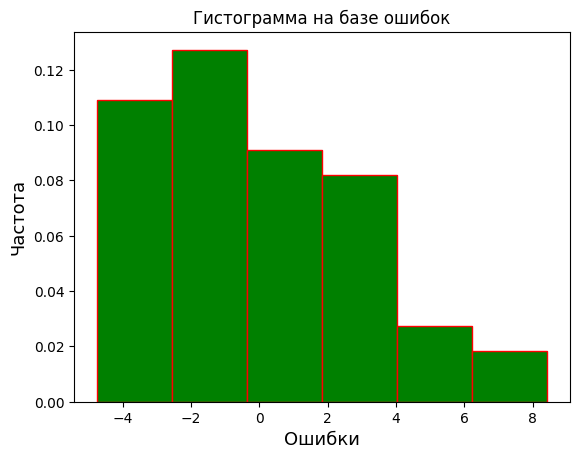

In [64]:
from scipy.stats import chisquare, kstest, norm, chi2, stats, t
from numpy.linalg import matrix_rank
import numpy as np
X = np.array([4, 8, 9, 4, 7, 2, 6, 8, 1, 2, 7, 0, 4, 4, 7, 0, 4, 6, 3, 4, 7, 2, 9, 8, 1, 3, 2, 9, 7, 4, 4, 4, 8, 0, 8, 9, 4, 7, 1, 8, 6, 1, 7, 3, 6, 7, 7, 9, 2, 8])

b = np.array([6.9828463696, -1.6983181169, 0.1993120248])

Y_1 = b[0] + b[1] * X + b[2]* X**2
err_2 = Y - Y_1
err_mi2 = min(err_2)
err_ma2 = max(err_2)

h = 2.20
plt.hist(err_2, bins = np.arange(err_mi2, err_ma2 + h, h), density = True, edgecolor='red', color='green')
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.show()


* Проверка гипотезы нормальности

Основная гипотеза $H_0$: $\vec{\varepsilon} \sim \mathcal{N}(0, \sigma^2)$

In [65]:
a = 0
sigma = 8.74**0.5
alpha = 0.01

inters = [[-np.inf, -2.7], [-2.7, 0], [0, 3], [3,np.inf]]

def p(x):
    return norm.cdf(x, a, sigma)

cr = 0
for inter in inters:
    p_ = p(inter[1]) - p(inter[0])
    n_ = len([x for x in err if inter[0] < x <= inter[1]])
    n_p = len(err)*p_
    temp = ((n_-n_p)**2)/(n_p)
    cr += temp
    print(inter ,'n =', n_, 'p =',round(p_, 2), 'np =', round(n_p, 2), ' ', round(temp, 2))

print(cr)

[-inf, -2.7] n = 10 p = 0.18 np = 9.03   0.1
[-2.7, 0] n = 17 p = 0.32 np = 15.97   0.07
[0, 3] n = 13 p = 0.34 np = 17.24   1.04
[3, inf] n = 10 p = 0.16 np = 7.76   0.65
1.8652456924224965


$I_1 = (\infty, -2.7]$ $n_1 = 10$  $p_1 = 0.18$  $np_1 = 9.03$   $\frac{(n_1-np_1)^{2}}{np_1} = 0.1$

$I_2 = (-2.7, 0]$ $n_2 = 17$  $p_2 = 0.32$  $np_2 = 15.97$   $\frac{(n_2-np_2)^{2}}{np_2} = 0.07$

$I_3 = (0, 3]$ $n_3 = 13$  $p_3 = 0.34$  $np_3 = 17.24$   $\frac{(n_3-np_3)^{2}}{np_3} = 1.04$

$I_4 = (3, \infty)$ $n_4 = 10$  $p_4 = 0.16$  $np_4 = 7.76$   $\frac{(n_4-np_4)^{2}}{np_4} = 0.65$

$Χ^2 = \sum_{i=1}^{4}\frac{(n_i - np_i)^2}{np_i} = 1.87$

$Χ^2_{N-1,\alpha} = Χ^2_{3,0.01} \simeq 11.34$(табличное значение)

$Χ^{2} <  Χ^2_{3,0.01} \Rightarrow$ нет оснований отвергнуть гипотезу


* Оценка расстояния до класса нормальных распределений по Колмогорову

Выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$

In [88]:
sigma = np.sqrt(8.74)
def cdf(x):
  return norm.cdf(x, loc = 0, scale = sigma)
Dn, _ = kstest(err_2, cdf)

eta = n**0.5 * Dn
print('Критерий Колмогорова:',eta)

Критерий Колмогорова: 0.5934339643083981


Уровень значимости $\alpha = 0.01$.

Квантиль $d_{1 - \alpha}$

In [89]:
from scipy.stats import kstwobign
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', d)

Квантиль:  1.6276236115189502


Критическая область $V_k = (d_{1 - \alpha},+ \infty)  = (1.63, + \infty)$

$\eta \in V_k \Rightarrow$ гипотеза отвергается.

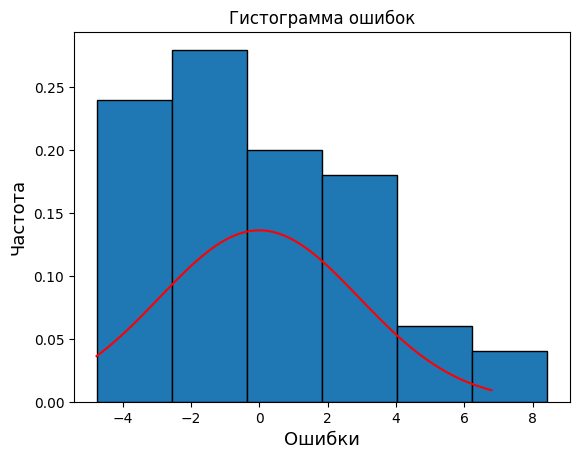

In [77]:
y, edges, _= plt.hist(err_2, edgecolor='black', bins=np.arange(err_mi2, err_ma2 + h, h), weights=np.ones_like(err_2) / n)
values = np.linspace(err_mi2, err_ma2, 100)

plt.title('Гистограмма ошибок')
plt.xlabel('Ошибки', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.plot(values, norm.pdf(values, np.array(err_2).mean(), np.array(err_2).std()), color='red')
plt.show()

Распределение ошибок визульно не похоже на нормальное распределение.

7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Напистаь уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.

$\beta_0$: $C = \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix};$
$\beta_1$: $C = \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix};$
$\beta_2$: $C = \begin{pmatrix} 0 \\ 0 \\ 1\end{pmatrix}$

In [78]:
C2_0 = np.array([1, 0, 0])
C2_1 = np.array([0, 1, 0])
C2_2 = np.array([0, 0, 1])
mnk_2 = np.array([6.9828463696, -1.6983181169, 0.1993120248])
fi_0 = np.matmul(C2_0,mnk_2)
fi_1 = np.matmul(C2_1,mnk_2)
fi_2 = np.matmul(C2_2,mnk_2)
print('fi_0 = ', fi_0)
print('fi_1 = ',fi_1)
print('fi_2 = ', fi_2)

fi_0 =  6.9828463696
fi_1 =  -1.6983181169
fi_2 =  0.1993120248


In [79]:
CT2_0 = C2_0.transpose()
CT2_1 = C2_1.transpose()
CT2_2 = C2_2.transpose()



b_0 = np.dot(np.dot(CT2_0, np.linalg.inv(XXT_2)), C2_0)
print("b_0 =",  round(b_0, 10))


b_1 = np.dot(np.dot(CT2_1, np.linalg.inv(XXT_2)), C2_1)
print("b_1 =", round(b_1, 10))

b_2 = np.dot(np.dot(CT2_2, np.linalg.inv(XXT_2)), C2_2)
print("b_2 =", round(b_2, 10))

b_0 = 0.1781936495
b_1 = 0.0429130635
b_2 = 0.000453929


$ \psi \in \left[ \hat{\psi} - x_\alpha S \sqrt{b_\psi}, \hat{\psi} + x_\alpha S \sqrt{b_\psi} \right] $, где $\displaystyle x_\alpha : S_{n - r} = 1 - \frac{\alpha}{2}$

In [80]:
alpha = 0.01
r = 3
x2_a = t.ppf(1 - alpha/2, (n-r))
print('x_alpha =', x2_a)
print("Функция распределения S =", round(sps.t.cdf(x2_a, 47), 3))

x_alpha = 2.6845556178665215
Функция распределения S = 0.995


In [81]:
print("Доверительный интервал b0 от", round(6.9828463696 - 2.68 * (8.737562915054273 * 0.1781936495) ** 0.5, 10), "до", round(6.9828463696 + 2.68 * (8.737562915054273 * 0.1781936495) ** 0.5, 10))
print("Доверительный интервал b1 от", round(-1.6983181169 - 2.68 * (8.737562915054273 * 0.0429130635) ** 0.5, 10), "до", round(-1.6983181169 + 2.68 * (8.737562915054273 * 0.0429130635) ** 0.5, 10))
print("Доверительный интервал b2 от", round(0.1993120248 - 2.68 * (8.737562915054273 * 0.000453929) ** 0.5, 10), "до", round(0.1993120248 + 2.68 * (8.737562915054273 * 0.000453929) ** 0.5, 10))


Доверительный интервал b0 от 3.6387709528 до 10.3269217864
Доверительный интервал b1 от -3.3393790681 до -0.0572571657
Доверительный интервал b2 от 0.0305308845 до 0.3680931651


$ \beta_0 \in \left[ 3.6387709528, 10.3269217864 \right] $

$ \beta_1 \in \left[ -3.3393790681, -0.0572571657 \right] $

$ \beta_2 \in \left[ 0.0305308845, 0.3680931651\right] $


Доверительный эллипсоид

$A_{\alpha} = \left\{\vec{x} : \left(\vec{x} - \widehat{\psi}\right)^{\intercal}B^{-1} \left(\vec{x} - \widehat{\psi}\right) \leq qs^2x_{\alpha}\right\}$ , где $x_{\alpha} : \mathrm{F}_{q, n-r} = 1 - \alpha$, $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix} = E$

Уравнение доверительного эллипсоида:

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 + \lambda_3z^2 \leq qs^2x_{\alpha}$

Таким образом $\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} + \frac{\lambda_3z^2}{qs^2x_{\alpha}}\normalsize \leq 1$, где $\lambda_1$ , $\lambda_2$ , $\lambda_3$ - собственные вектора

Найдём $x_\alpha$

In [96]:
F = 0.99
x_a = sps.f.ppf(F, 3, 47)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Фишера-Синдекора F_3_47(x_a) =", round(sps.f.cdf(x_a, 3, 47), 3))

При квантиле x_a = 4.228
Функция распределения Фишера-Синдекора F_3_47(x_a) = 0.99


In [83]:
XT_2 = np.transpose(X_2)
x = np.matmul(X_2,XT_2)
print(x)

[[   50   251  1649]
 [  251  1649 11945]
 [ 1649 11945 91157]]


$XX^{\intercal} =  \begin{pmatrix}50 & 251 & 1649\\ 251 & 1649 & 11945 \\ 1649 & 11945 & 91157 \end{pmatrix}$

$(\vec{x} - \hat{\psi} )^{\intercal} B^{-1} ( \vec{x} - \hat{\psi} ) = \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right) - \left( \begin{array}{c} 6.98 \\ -1.70 \\ 0.20 \end{array} \right) \right)^{\intercal} X X^{\intercal} \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right) - \left( \begin{array}{c} 6.98 \\ -1.70 \\ 0.20 \end{array} \right) \right)$\
$= \left( \begin{array}{c} \beta_0 -  6.98 \\ \beta_1 + 1.70 \\ \beta_2 - 0.20 \end{array} \right)^{\intercal} \left( \begin{array}{c} 50 & 251 & 1649 \\ 251 & 1649 & 11945 \\ 1649 & 11945 & 91157 \end{array} \right) \left( \begin{array}{c} \beta_0 -  6.98 \\ \beta_1 + 1.70 \\ \beta_2 - 0.20 \end{array} \right)$

Перепишем коэффициенты квадратичной формы в матрицу.\
$ A = \left( \begin{array}{c} 50 & 251 & 1649 \\ 251 & 1649 & 11945 \\ 1649 & 11945 & 91157 \end{array} \right)$

Найдём собственные числа.\
$ \left| \begin{array}{c} 50 - \lambda & 251 & 1649 \\ 251 & 1649 - \lambda & 11945 \\ 1649 & 11945 & 91157 - \lambda \end{array} \right| = 0 ⇒ \lambda_1 = 14.708, \lambda_2 = 1395.110,\lambda_3 = 91446.182$

$ \lambda_1 \cdot x^2 + \lambda_2 \cdot y^2 + \lambda_3 \cdot z^2 \leq q S^2 x_\alpha$\
$  14.708 \cdot x^2 + 1395.110 \cdot y^2 + 91446.182 \cdot z^2 \leq 57.79$\
$ 0.25 \cdot x^2 +  24.14 \cdot y^2 + 1582.39 \cdot z^2 \leq 1$ - уравнение эллипсоида


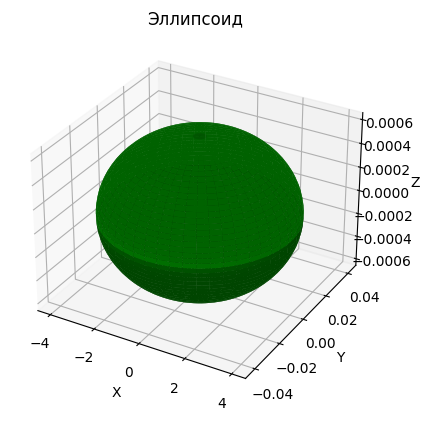

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = 1 / 0.25
b = 1 / 24.14
c = 1 / 1582.39

u = np.linspace(0, 2*np.pi , 100)
v = np.linspace(0, np.pi , 50)

x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color = 'green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Эллипсоид')

plt.show()

8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha = 0.01$.

Нулевая гипотеза: $H_0: \beta_2 = 0$

Альтернативная гипотеза: $H_A: \beta_2 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ , $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$. Тогда $\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_2} ⇒ \mathbb{F} = \large \frac{\widehat{\beta_2}^2}{bqs^2}$

Квантиль:

$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha = 0.99 \rightarrow x_{\alpha} = 7.2$

In [84]:
n = 50
r = 3
alpha = 0.01

q = 1
s2 = 8.74
x_alpha = f.ppf(1 - alpha, q, n - r)
print('x_alpha =', x_alpha)

C = np.array([0, 0, 1])
CT_2 = C.transpose()
b_2 = np.matmul(np.matmul(CT_2, np.linalg.inv(XXT_2)), C)
F_2 = (0.1993120248**2) / (b_2*q*s2)
print('F - критерий = ', F_2)


F_q = f.ppf(1 - alpha, q, n - r)
print('Критическое значение:', F_q)


x_alpha = 7.2068388654187014
F - критерий =  10.013078102878808
Критическое значение: 7.2068388654187014


Так как статистика критерия F больше критического значения, **гипотеза отвергается**

## Выводы

В ходе практической работы был использован метод наименьших квадратов (МНК) для создания модели линейной регрессии, оценены параметры модели и проверена гипотеза о нормальности ошибок. Также были построены доверительные интервалы и оценены доверительные эллипсоиды для параметров с заданным уровнем доверия. Была также проверена гипотеза о независимости переменных Y и X. В процессе работы была изучена тема линейной зависимости между переменными с учетом дополнительного параметра. Результаты практической работы включают в себя анализ линейной регрессии, построение модели, проверку гипотез и использование статистических инструментов, таких как критерий Колмогорова, для оценки полученных данных.